# **Cross-platform Analysis of Most Streamed Spotify Songs 2023**
This analysis looks at the most streamed spotify songs of 2023 and how they perform across different music streaming platforms. 

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


### 2. Load the dataset

In [2]:
df=pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 953 rows and 24 columns.


In [4]:
# Print the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### 3. Data Cleaning

In [5]:
#check missing values
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

**Missing Values in coulmns:**
* in_shazam_charts = 50 
* key = 95

In [6]:
# Missing values in column 'key' will be replaced as 'missing_key' because the data must be an object
df['key'] = df['key'].fillna("missing_key")

# Missing values in column 'in shazam charts' will be replaced with 0 because the data must be an integer
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Now we dont have missing values. 

**Remove duplicate songs**


In [7]:
df.duplicated(subset=['track_name','artist(s)_name']).sum()

df[df.duplicated(subset=['track_name', 'artist(s)_name'], keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,missing_key,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,missing_key,Major,56,52,64,11,0,45,7


In [8]:
# Remove duplicates based on 'track_name' and 'artist(s)_name'
df_cleaned = df.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first')

# Print the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 949


**Data type conversion**

Converting specific columns to numeric data type (float64 or int64), coercing any errors encountered (such as non-numeric strings) to NaN (Not a Number).

In [9]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      946 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

**Another thing is, there are columns that we are not gonna use or have benefit from them like the key and mode columns so we will drop them.**


In [10]:
# Drop the columns 'key' and 'mode'
df = df.drop(columns=['key', 'mode'])

# Print DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      946 non-null    float64
 14  bpm                   953 non-null    int64  
 15  danceability_%        9

### 4. Exploratory Data Analysis (EDA)

**The graph shows a distribution of songs based on the number of artists involved in each song.**

The x-axis represents the number of artists contributing to a song (artist_count).
The y-axis shows the count of songs for each category of artist count.

The data indicates that single-artist songs dominate the dataset, with a significant drop in frequency as the number of artists per song increases beyond two.

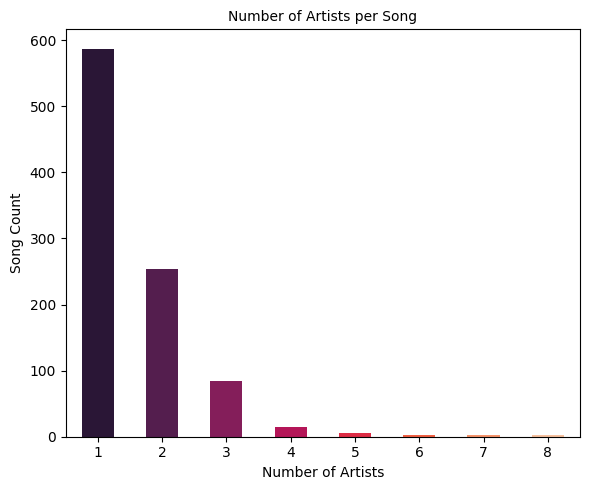

In [11]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='artist_count', palette="rocket", width=0.5, saturation=2)
plt.title('Number of Artists per Song', fontsize=10)
plt.xlabel('Number of Artists')
plt.ylabel('Song Count')
plt.tight_layout()
plt.show()

**Total number of streams on Spotify**

**The graph displays the total streams accumulated by the top 10 artists in our dataset.**

The y-axis lists the names of the artists, sorted by their total streams in descending order.

The x-axis represents the total streams in billions.

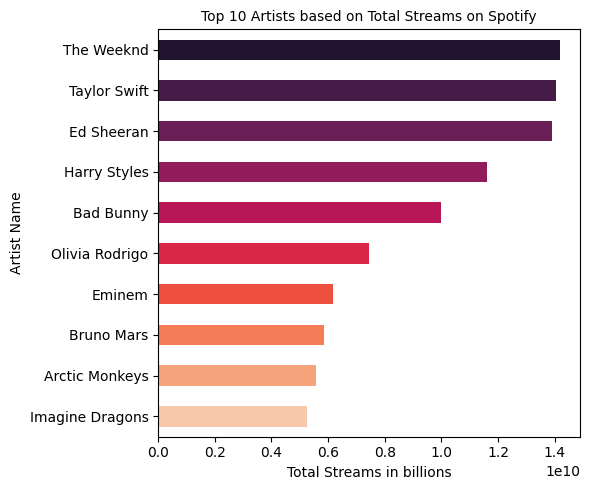

In [12]:
# Group by artist and sum up their streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

# Plot the artists with the most streams
plt.figure(figsize=(6, 5))
sns.barplot(x=artist_streams.values, y=artist_streams.index, palette="rocket" ,width=0.5, saturation = 2,orient='h')
plt.title('Top 10 Artists based on Total Streams on Spotify', fontsize=10)
plt.xlabel('Total Streams in billions')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

 **Number of songs each artist has within the dataset.**

The y-axis lists the names of the artists, sorted by the number of songs they have in descending order.

The x-axis represents the count of songs.

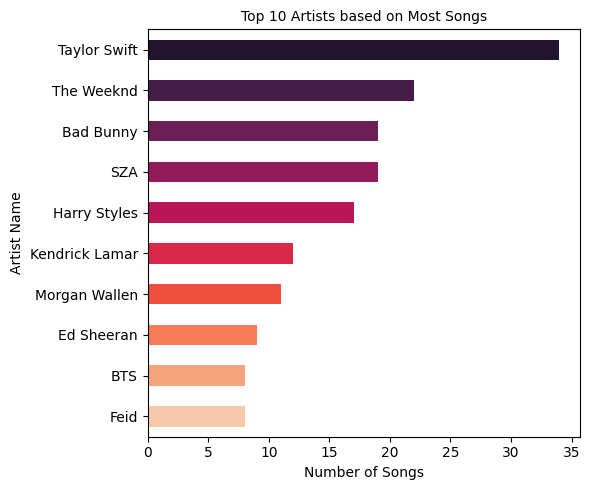

In [13]:
# Count every song by artist
top_artists = df['artist(s)_name'].value_counts().head(10)

# Plot the top 10 artists based on the number of songs
plt.figure(figsize=(6, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="rocket", width=0.5, saturation=2, orient='h')
plt.title('Top 10 Artists based on Most Songs', fontsize=10)
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

Top 10 Songs Based on Streams on Spotify:
Track: Blinding Lights, Streams: 3,703,895,074.0
Track: Shape of You, Streams: 3,562,543,890.0
Track: Someone You Loved, Streams: 2,887,241,814.0
Track: Sunflower - Spider-Man: Into the Spider-Verse, Streams: 2,808,096,550.0
Track: One Dance, Streams: 2,713,922,350.0
Track: STAY (with Justin Bieber), Streams: 2,665,343,922.0
Track: Believer, Streams: 2,594,040,133.0
Track: Starboy, Streams: 2,565,529,693.0
Track: Perfect, Streams: 2,559,529,074.0
Track: Heat Waves, Streams: 2,557,975,762.0


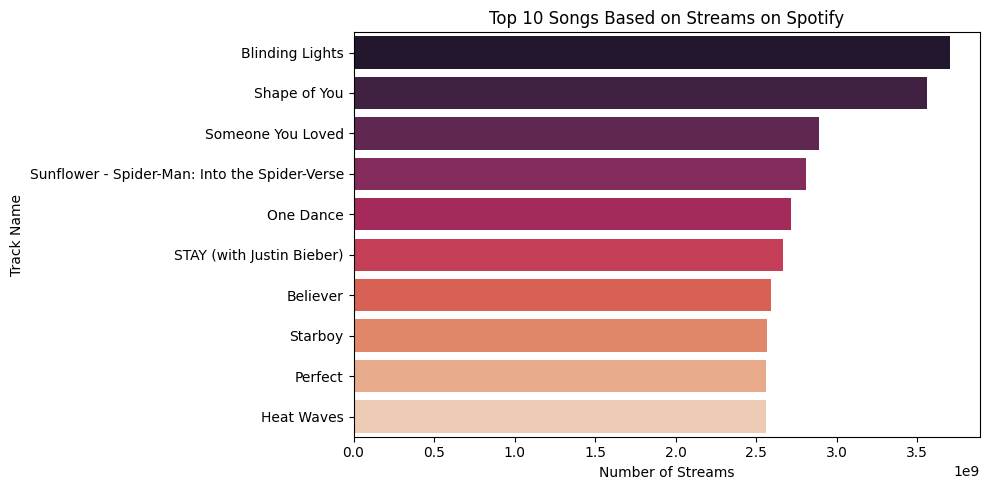

In [14]:
# Filter the DataFrame for songs in Spotify charts
spotify_songs = df[df['in_spotify_charts'] > 0]

# Sort the songs by the number of streams in descending order
top_spotify_songs = spotify_songs.sort_values(by='streams', ascending=False)

# Select the top 10 songs
top_10_spotify_songs = top_spotify_songs.head(10)

# Print the top 10 songs based on streams on Spotify
print("Top 10 Songs Based on Streams on Spotify:")
top_10_spotify_songs = spotify_songs.sort_values(by='streams', ascending=False).head(10)

for index, row in top_10_spotify_songs.iterrows():
    print(f"Track: {row['track_name']}, Streams: {row['streams']:,}")

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_spotify_songs, x='streams', y='track_name', palette='rocket')
plt.title('Top 10 Songs Based on Streams on Spotify')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()


**Number of streams each track has in the dataset.**

* The y-axis lists the names of the tracks, sorted by the number of streams they have in descending order.

* The x-axis represents the number of streams.

**Correlation heatmap of chart appearances across Spotify, Apple Music, Deezer, and Shazam:**

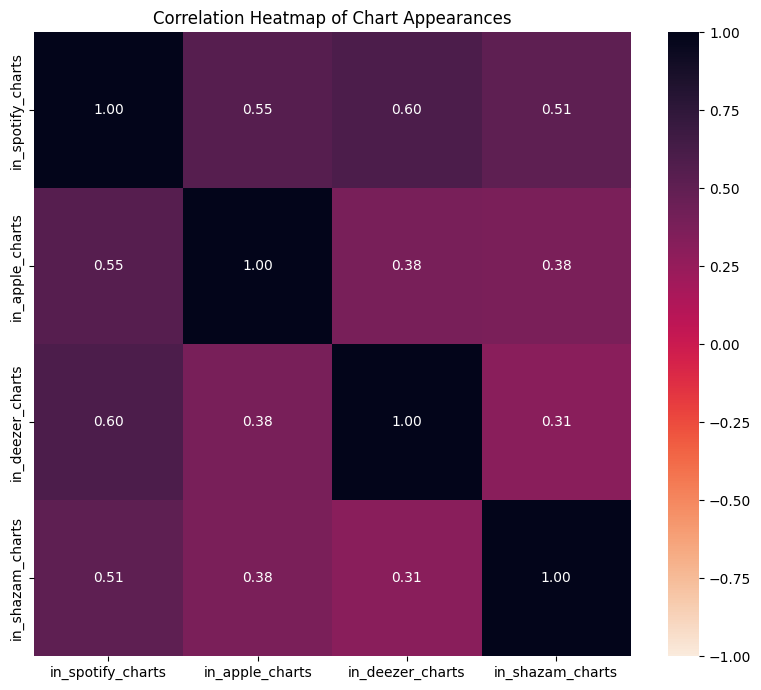

In [15]:
heatmap_data = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

#Correlation between the appearances of songs on different music charts (Spotify, Apple, Deezer, and Shazam)
plt.figure(figsize=(8, 7))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='rocket_r', fmt='.2f', vmin =-1, vmax = 1)
plt.title('Correlation Heatmap of Chart Appearances')
plt.tight_layout()
plt.show()

High correlation values suggest that the same songs are popular across multiple platforms, while low correlation values suggest platform-specific popularity.

The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

* 1 indicates a perfect positive correlation
* -1 indicates a perfect negative correlation
* 0 indicates no correlation

Strongest Correlation: 
* The highest correlation is between Spotify and Deezer charts (0.60), suggesting that songs popular on Spotify are likely to be popular on Deezer as well.

Moderate Correlation:
* Spotify and Apple have a moderate correlation (0.55), indicating that there is a significant overlap between songs popular on these two platforms.
* Spotify and Shazam also have a moderate correlation (0.51), implying that songs frequently appearing on Spotify charts are often recognized on Shazam.

Lower Correlation:
* Apple and Deezer have lower correlation (0.38) which is still positive but weaker compared to Spotify's correlations with other platforms.
* Apple and Shazam also has same correlation as Apple and Deezer (0.38).
* Deezer and Shazam have the lowest correlation (0.31), indicating less overlap between these platforms.

There is a noticeable overlap in song popularity between Spotify, Deezer, and Apple, with Spotify showing a stronger correlation with Deezer. Shazam has the weakest correlations with other platforms, indicating that songs recognized on Shazam might not always align with the most popular songs on streaming platforms.


**Counting the number of songs on each platform's chart**

In [16]:
# Counting the number of songs on each platform's chart
platform_counts = {
    'Platform': ['Spotify', 'Apple Music', 'Deezer', 'Shazam'],
    'Count': [
        (df['in_spotify_charts'] > 0).sum(),
        (df['in_apple_charts'] > 0).sum(),
        (df['in_deezer_charts'] > 0).sum(),
        (df['in_shazam_charts'] > 0).sum()
    ]
}

# Print the counts
for platform, count in zip(platform_counts['Platform'], platform_counts['Count']):
    print(f"Number of songs on {platform} charts: {count}")

Number of songs on Spotify charts: 548
Number of songs on Apple Music charts: 853
Number of songs on Deezer charts: 395
Number of songs on Shazam charts: 552


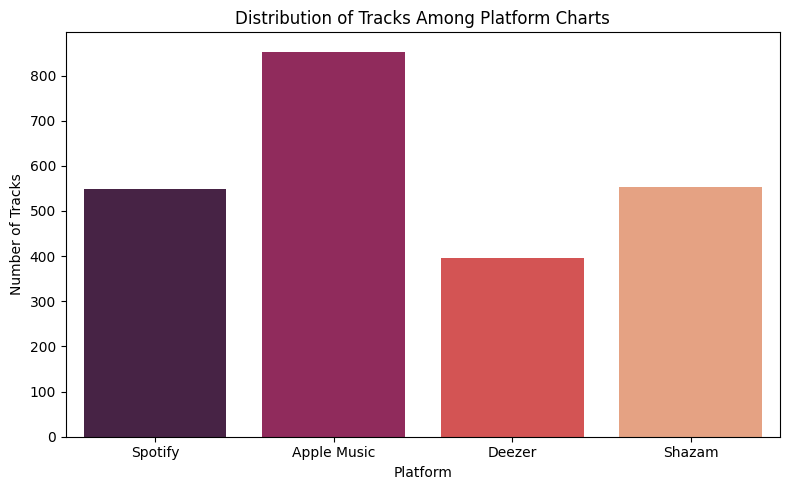

In [17]:
# Convert to DataFrame
platform_counts_df = pd.DataFrame(platform_counts)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=platform_counts_df, x='Platform', y='Count', palette='rocket')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Tracks Among Platform Charts')
plt.tight_layout()
plt.show()

**Distribution of tracks across different music streaming platforms based on their inclusion in playlists.**

Spotify chart tracks: 549
Apple chart tracks: 853
Deezer chart tracks: 396


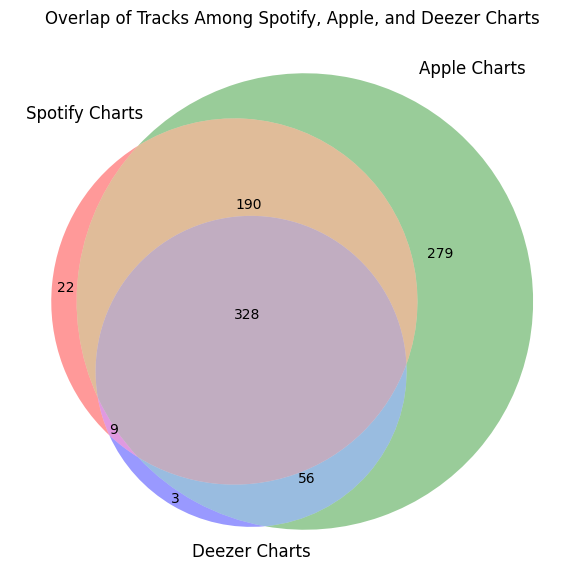

In [18]:
# Create sets of tracks for each chart platform
spotify_chart_tracks = set(df[df['in_spotify_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])
apple_chart_tracks = set(df[df['in_apple_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])
deezer_chart_tracks = set(df[df['in_deezer_charts'] > 0]['track_name'] + ' - ' + df['artist(s)_name'])

# Display the sizes of the sets to help diagnose issues
print(f'Spotify chart tracks: {len(spotify_chart_tracks)}')
print(f'Apple chart tracks: {len(apple_chart_tracks)}')
print(f'Deezer chart tracks: {len(deezer_chart_tracks)}')

# Create a Venn diagram
plt.figure(figsize=(10, 7))
venn3([spotify_chart_tracks, apple_chart_tracks, deezer_chart_tracks], ('Spotify Charts', 'Apple Charts', 'Deezer Charts'))
plt.title('Overlap of Tracks Among Spotify, Apple, and Deezer Charts')
plt.show()

      Platform  Average Number of Playlists
0      Spotify                  5200.124869
1  Apple Music                    67.812172
2       Deezer                   109.740275


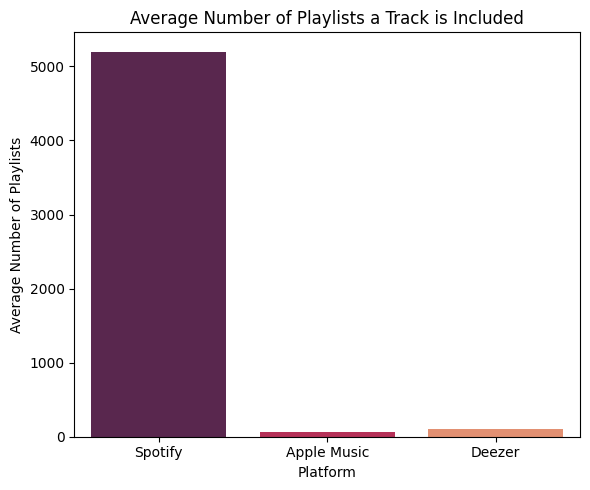

In [19]:
# Calculate the average number of playlists a track is included in for each platform
avg_playlists = {
    'Platform': ['Spotify', 'Apple Music', 'Deezer'],
    'Average Number of Playlists': [
        df['in_spotify_playlists'].mean(),
        df['in_apple_playlists'].mean(),
        df['in_deezer_playlists'].mean()
    ]
}

# Convert to DataFrame
avg_playlists_df = pd.DataFrame(avg_playlists)

# Display the average number of playlists for each platform
print(avg_playlists_df)

# Plotting the average number of playlists a track is included in
plt.figure(figsize=(6, 5))
sns.barplot(data=avg_playlists_df, x='Platform', y='Average Number of Playlists', palette='rocket')
plt.xlabel('Platform')
plt.ylabel('Average Number of Playlists')
plt.title('Average Number of Playlists a Track is Included')
plt.tight_layout()
plt.show()


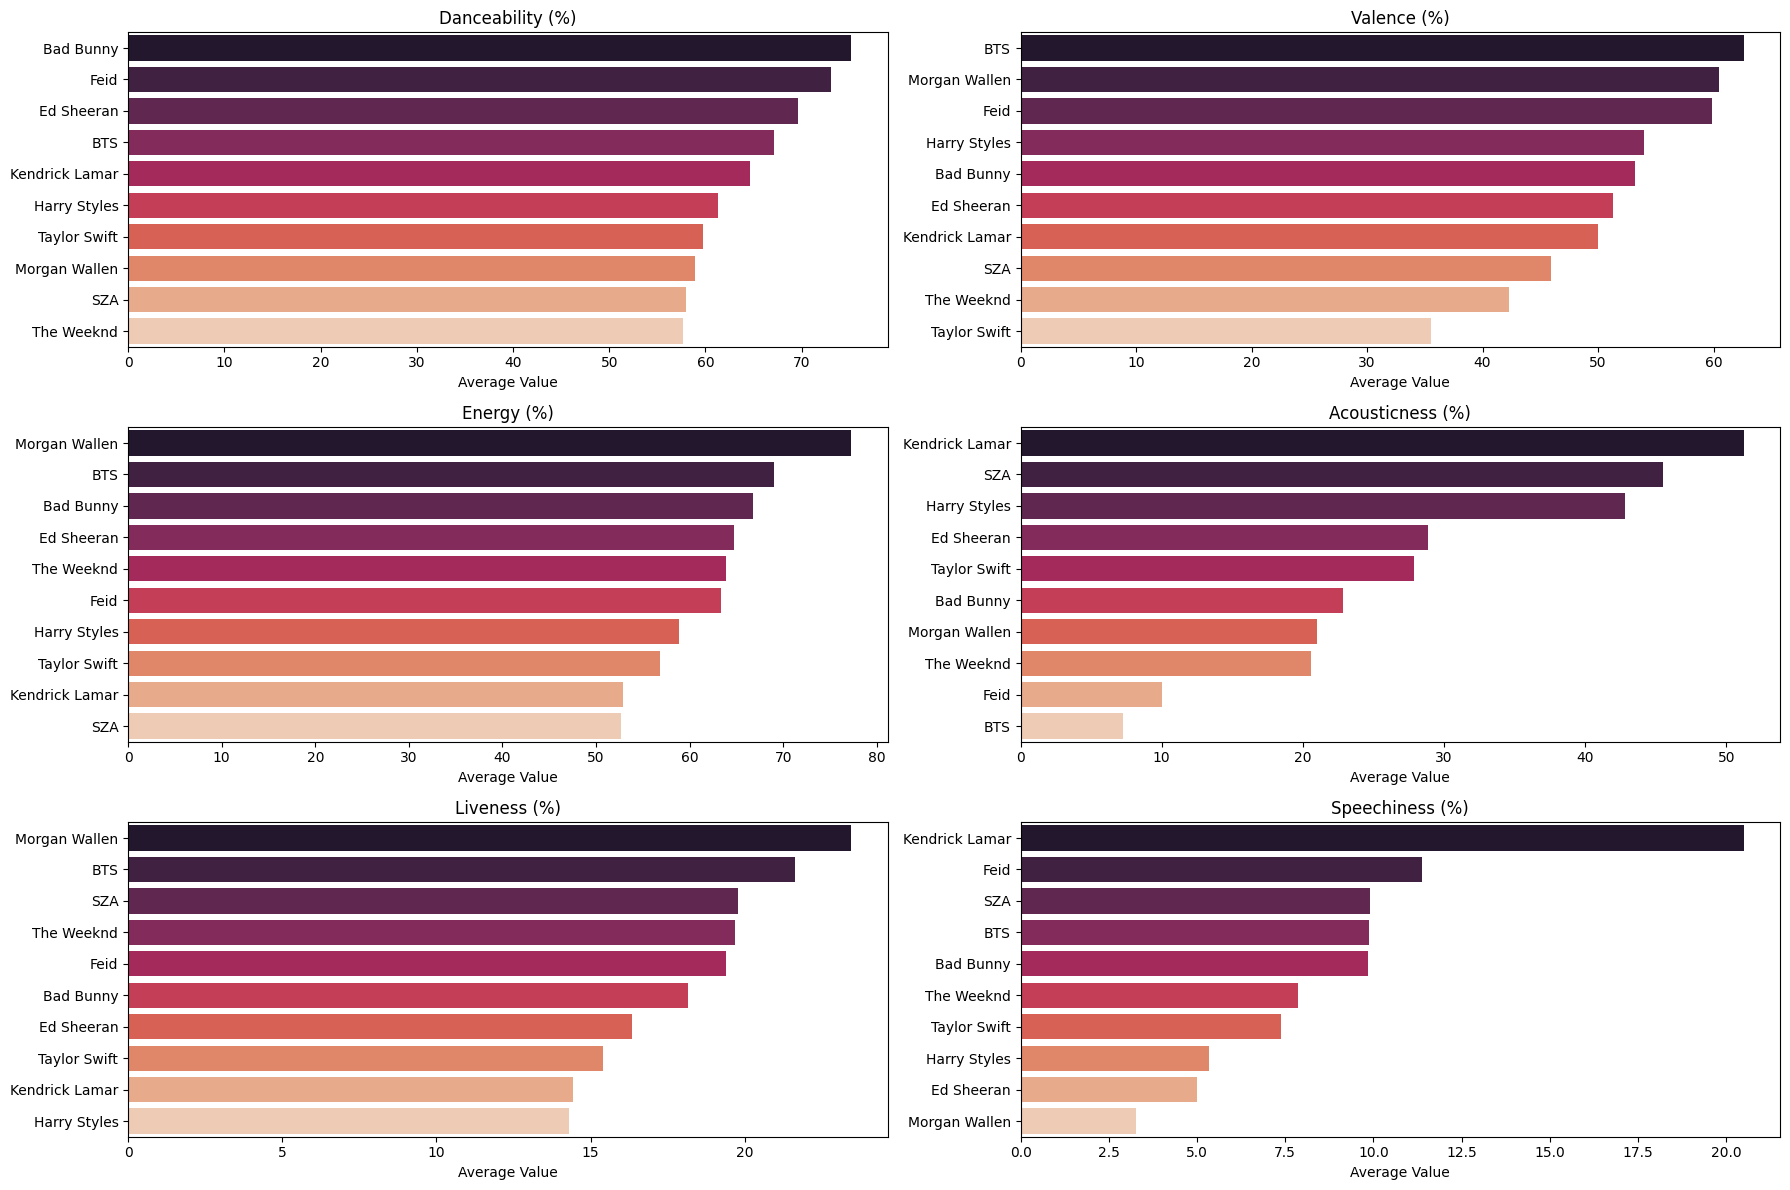

In [20]:
# Top 10 artists based on the number of songs
top_artists = df['artist(s)_name'].value_counts().head(10).index
top_artists_df = df[df['artist(s)_name'].isin(top_artists)]

# Calculate average values of audio features for the top 10 artists
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
top_artists_features = top_artists_df.groupby('artist(s)_name')[audio_features].mean()

# Set up the plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Titles for the plots
feature_titles = {
    'danceability_%': 'Danceability (%)',
    'valence_%': 'Valence (%)',
    'energy_%': 'Energy (%)',
    'acousticness_%': 'Acousticness (%)',
    'liveness_%': 'Liveness (%)',
    'speechiness_%': 'Speechiness (%)'
}

# Plot each feature
for idx, feature in enumerate(audio_features):
    # Sort the average values
    sorted_features = top_artists_features[feature].sort_values(ascending=False)
    
    sns.barplot(x=sorted_features.values, y=sorted_features.index, palette="rocket", ax=axes[idx])
    axes[idx].set_title(feature_titles[feature], fontsize=12)
    axes[idx].set_xlabel('Average Value')
    axes[idx].set_ylabel('')

# Remove any unused subplots
for ax in axes[len(audio_features):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

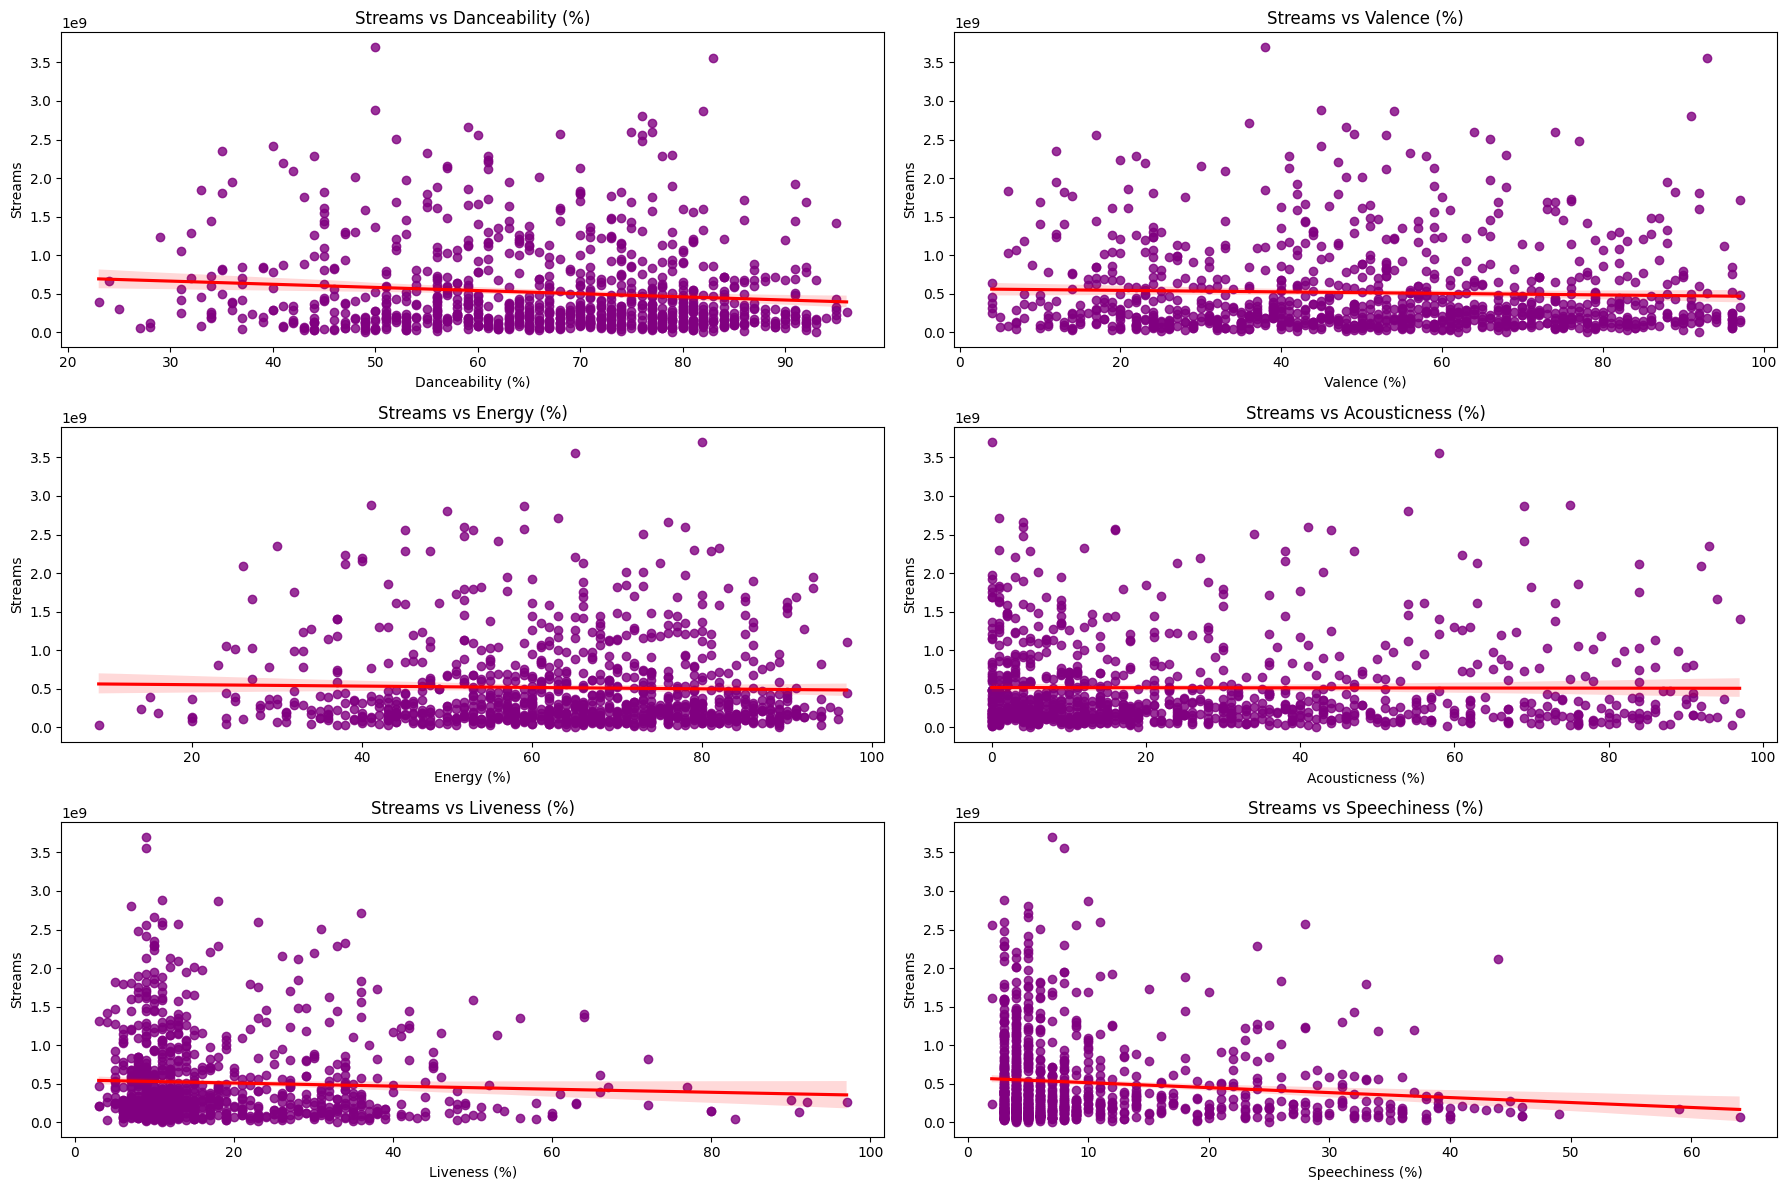

In [21]:
# List of audio features to plot against streams
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']

# Set up the plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Titles for the plots
feature_titles = {
    'danceability_%': 'Danceability (%)',
    'valence_%': 'Valence (%)',
    'energy_%': 'Energy (%)',
    'acousticness_%': 'Acousticness (%)',
    'liveness_%': 'Liveness (%)',
    'speechiness_%': 'Speechiness (%)'
}

# Plot each feature against streams with regression lines
for idx, feature in enumerate(audio_features):
    sns.regplot(data=df, x=feature, y='streams', ax=axes[idx], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    axes[idx].set_title(f'Streams vs {feature_titles[feature]}', fontsize=12)
    axes[idx].set_xlabel(feature_titles[feature])
    axes[idx].set_ylabel('Streams')

# Remove any unused subplots
for ax in axes[len(audio_features):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

Streams vs Danceability
* The regression line is slightly tilted upwards, indicating a weak positive correlation. Danceability has a minimal positive impact on the number of streams.

Streams vs Valence 
* The regression line is slightly tilted upwards, indicating a weak positive correlation. Valence has a minimal positive effect on the number of streams.

Streams vs Energy
* The regression line is slightly tilted upwards, indicating a weak positive correlation. Energy has a minimal positive impact on the number of streams.

Streams vs Acousticness
* The regression line is almost flat, indicating a very weak or no correlation. Acousticness does not significantly impact the number of streams.

Streams vs Liveness
* The regression line is slightly tilted downwards, indicating a weak negative correlation. Liveness has a minimal negative effect on the number of streams.

Streams vs Speechiness
* The regression line shows a slight negative slope, indicating a weak negative correlation. Higher speechiness might slightly reduce the number of streams, but the effect is weak.

The scatter plots and regression lines indicate weak correlations between the number of streams and the audio features analyzed. These features alone do not strongly influence the number of streams, suggesting that other factors might play a more significant role in determining a track’s popularity.

**This code allows you to visualize and compare the distribution of song releases by year across different platforms, providing insights into release trends and enabling cross-platform analysis.**

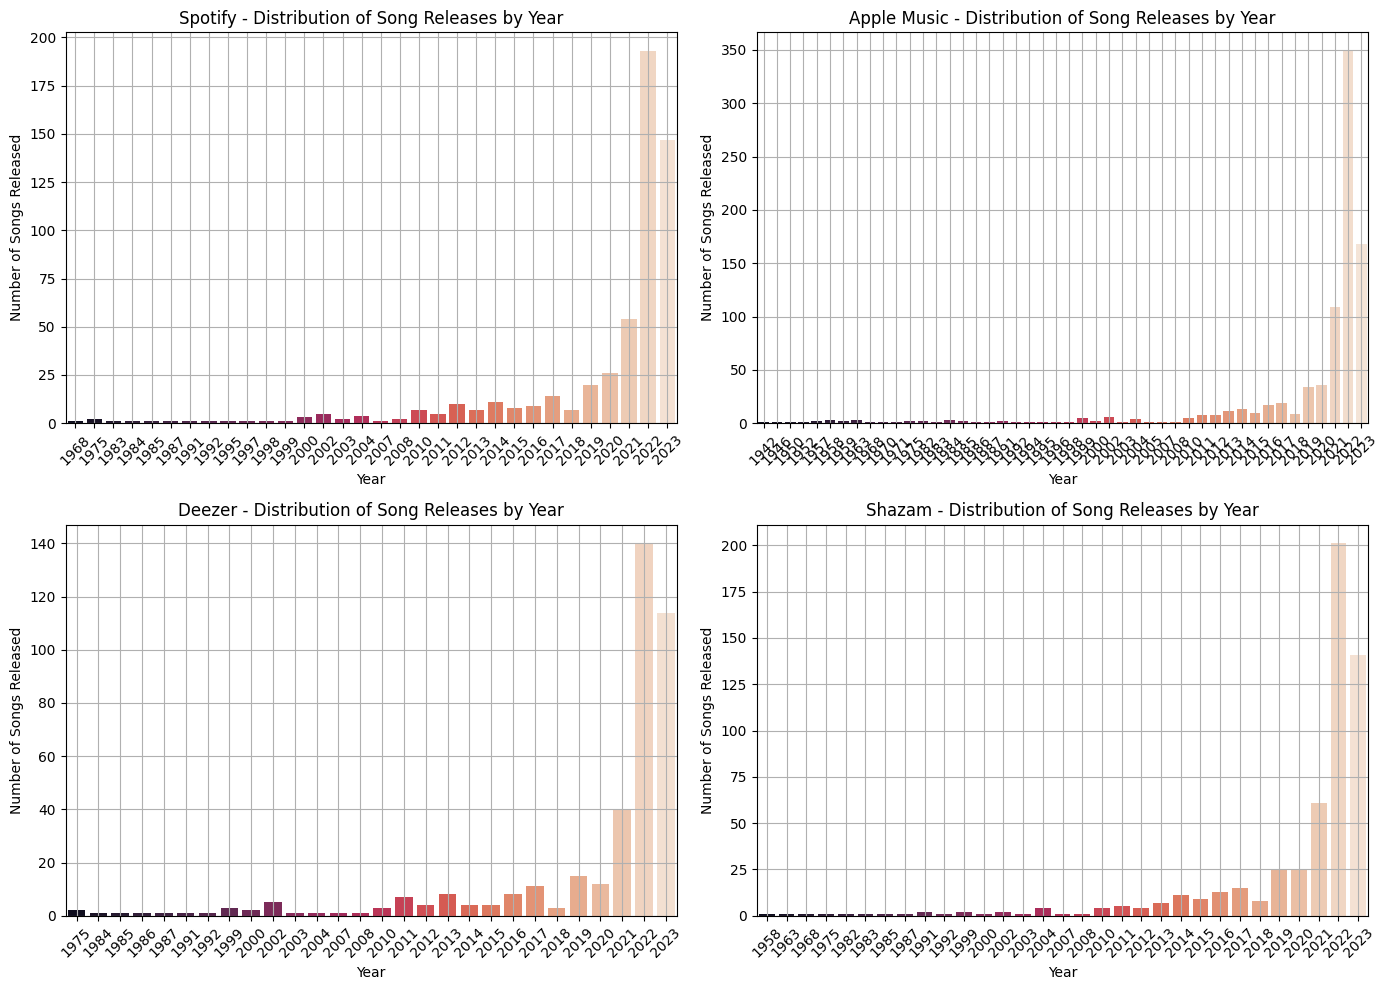


Number of releases by year for Spotify:
release_date
1968      1
1975      2
1983      1
1984      1
1985      1
1987      1
1991      1
1992      1
1995      1
1997      1
1998      1
1999      1
2000      3
2002      5
2003      2
2004      4
2007      1
2008      2
2010      7
2011      5
2012     10
2013      7
2014     11
2015      8
2016      9
2017     14
2018      7
2019     20
2020     26
2021     54
2022    193
2023    147
Name: count, dtype: int64

Number of releases by year for Apple Music:
release_date
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      1
1971      1
1975      2
1982      2
1983      1
1984      3
1985      2
1986      1
1987      1
1991      2
1992      1
1994      1
1995      1
1996      1
1998      1
1999      5
2000      2
2002      6
2003      1
2004      4
2005      1
2007      1
2008      1
2010      5
2011      8
2012      8
2013     11
2014     13
2015     10
2016     17
2017     1

In [22]:
# List of platforms and their corresponding columns in the dataset
platforms = ['Spotify', 'Apple Music', 'Deezer', 'Shazam']
platform_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']

# Create a dictionary to store the releases count by year for each platform
releases_by_year = {}

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over platforms and corresponding columns
for i, (platform, col) in enumerate(zip(platforms, platform_columns)):
    # Filter the dataframe for the current platform
    platform_df = df[df[col] > 0].copy()
    
    # Creating a 'release_date_string' column for the current platform
    platform_df['release_date_string'] = platform_df['released_year'].astype(str) + '-' + \
                                        platform_df['released_month'].astype(str) + '-' + \
                                        platform_df['released_day'].astype(str)
    
    # Converting the 'release_date_string' column to datetime data type for the current platform
    platform_df['release_date'] = pd.to_datetime(platform_df['release_date_string'], errors='coerce')
    
    # Rechecking the distribution of song releases by year for the current platform
    yearly_releases = platform_df['release_date'].dt.year.value_counts().sort_index()
    
    # Store the yearly releases in the dictionary
    releases_by_year[platform] = yearly_releases
    
    # Creating a DataFrame for seaborn
    yearly_releases_df = yearly_releases.reset_index()
    yearly_releases_df.columns = ['Year', 'Number of Songs Released']
    
    # Plotting the distribution of song releases by year for the current platform
    sns.barplot(data=yearly_releases_df, x='Year', y='Number of Songs Released', ax=axes[i], palette='rocket')
    axes[i].set_title(f'{platform} - Distribution of Song Releases by Year', fontsize=12)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Songs Released')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the number of releases by year for each platform
for platform, releases in releases_by_year.items():
    print(f"\nNumber of releases by year for {platform}:")
    print(releases)

* Spotify:
    * There is a noticeable increase in the number of releases starting from around 2010, with a significant spike in recent years (2021 and 2022). This trend suggests growing activity and content on the platform.



* Apple Music:    
    * Similar to Spotify, Apple Music also shows a sharp increase in releases from 2020 onwards, with the highest number of releases in 2022. This indicates a substantial rise in content volume on the platform.



* Deezer:    
    * Deezer’s release trend also shows growth, especially in recent years, but the increase is less pronounced compared to Spotify and Apple Music. There is a steady rise, with a peak in 2022.



* Shazam:    
    * Shazam's data shows an increase in song releases starting from around 2016, with significant spikes in recent years. The trend indicates that Shazam is becoming increasingly relevant in the music release landscape.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

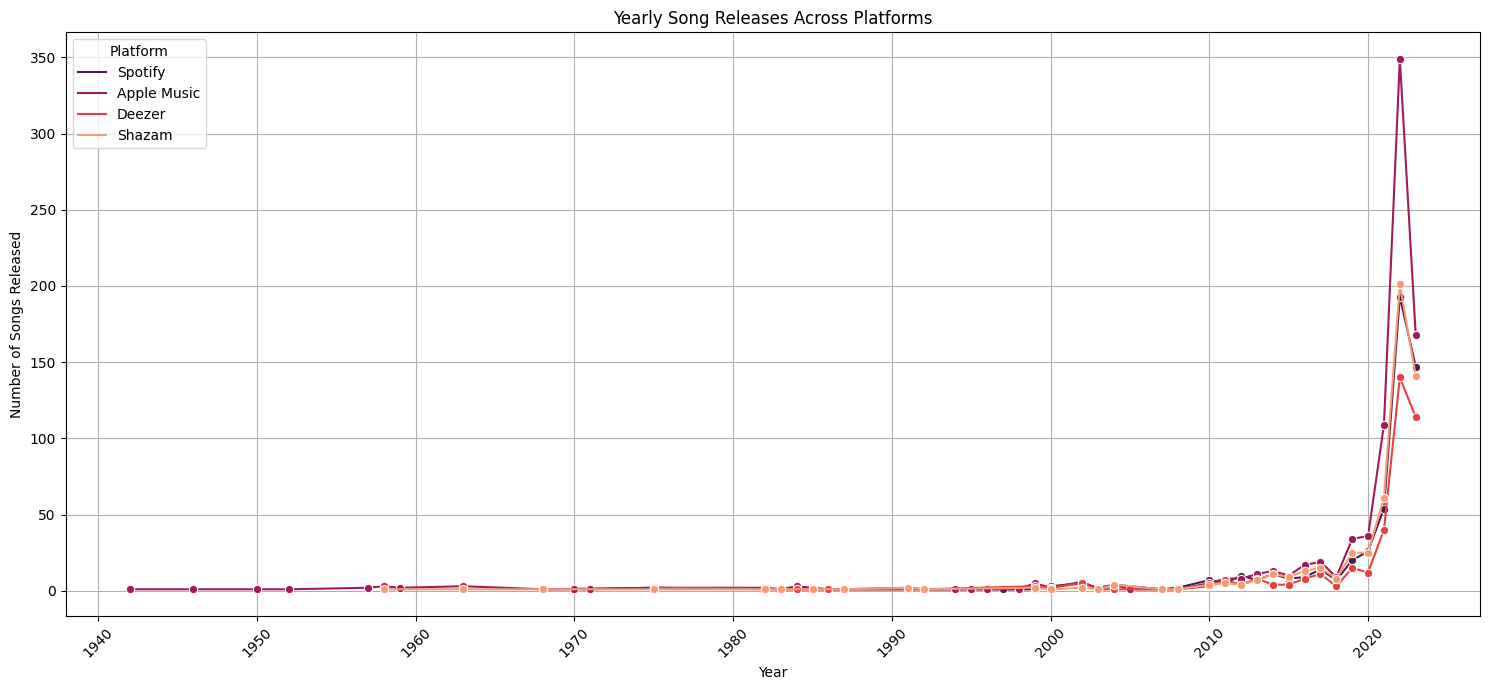

In [23]:
# Combine data from all platforms
all_yearly_releases = []

for platform, col in zip(platforms, platform_columns):
    platform_df = df[df[col] > 0].copy()
    platform_df['release_date_string'] = platform_df['released_year'].astype(str) + '-' + \
                                        platform_df['released_month'].astype(str) + '-' + \
                                        platform_df['released_day'].astype(str)
    platform_df['release_date'] = pd.to_datetime(platform_df['release_date_string'], errors='coerce')
    yearly_releases = platform_df['release_date'].dt.year.value_counts().sort_index()
    yearly_releases_df = yearly_releases.reset_index()
    yearly_releases_df.columns = ['Year', 'Number of Songs Released']
    yearly_releases_df['Platform'] = platform
    all_yearly_releases.append(yearly_releases_df)

combined_yearly_releases_df = pd.concat(all_yearly_releases)

# Plot combined data
plt.figure(figsize=(15, 7))
sns.lineplot(data=combined_yearly_releases_df, x='Year', y='Number of Songs Released', hue='Platform', marker='o', palette='rocket')
plt.title('Yearly Song Releases Across Platforms')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Monthly Song Releases for Spotify:
Jan: 64 songs
Feb: 41 songs
Mar: 52 songs
Apr: 44 songs
May: 71 songs
Jun: 55 songs
Jul: 47 songs
Aug: 26 songs
Sep: 31 songs
Oct: 35 songs
Nov: 37 songs
Dec: 45 songs

Monthly Song Releases for Apple Music:
Jan: 121 songs
Feb: 55 songs
Mar: 79 songs
Apr: 58 songs
May: 109 songs
Jun: 76 songs
Jul: 52 songs
Aug: 43 songs
Sep: 52 songs
Oct: 64 songs
Nov: 74 songs
Dec: 70 songs

Monthly Song Releases for Deezer:
Jan: 54 songs
Feb: 32 songs
Mar: 34 songs
Apr: 27 songs
May: 43 songs
Jun: 49 songs
Jul: 33 songs
Aug: 21 songs
Sep: 24 songs
Oct: 24 songs
Nov: 26 songs
Dec: 28 songs

Monthly Song Releases for Shazam:
Jan: 69 songs
Feb: 37 songs
Mar: 56 songs
Apr: 46 songs
May: 69 songs
Jun: 53 songs
Jul: 36 songs
Aug: 30 songs
Sep: 36 songs
Oct: 38 songs
Nov: 40 songs
Dec: 42 songs


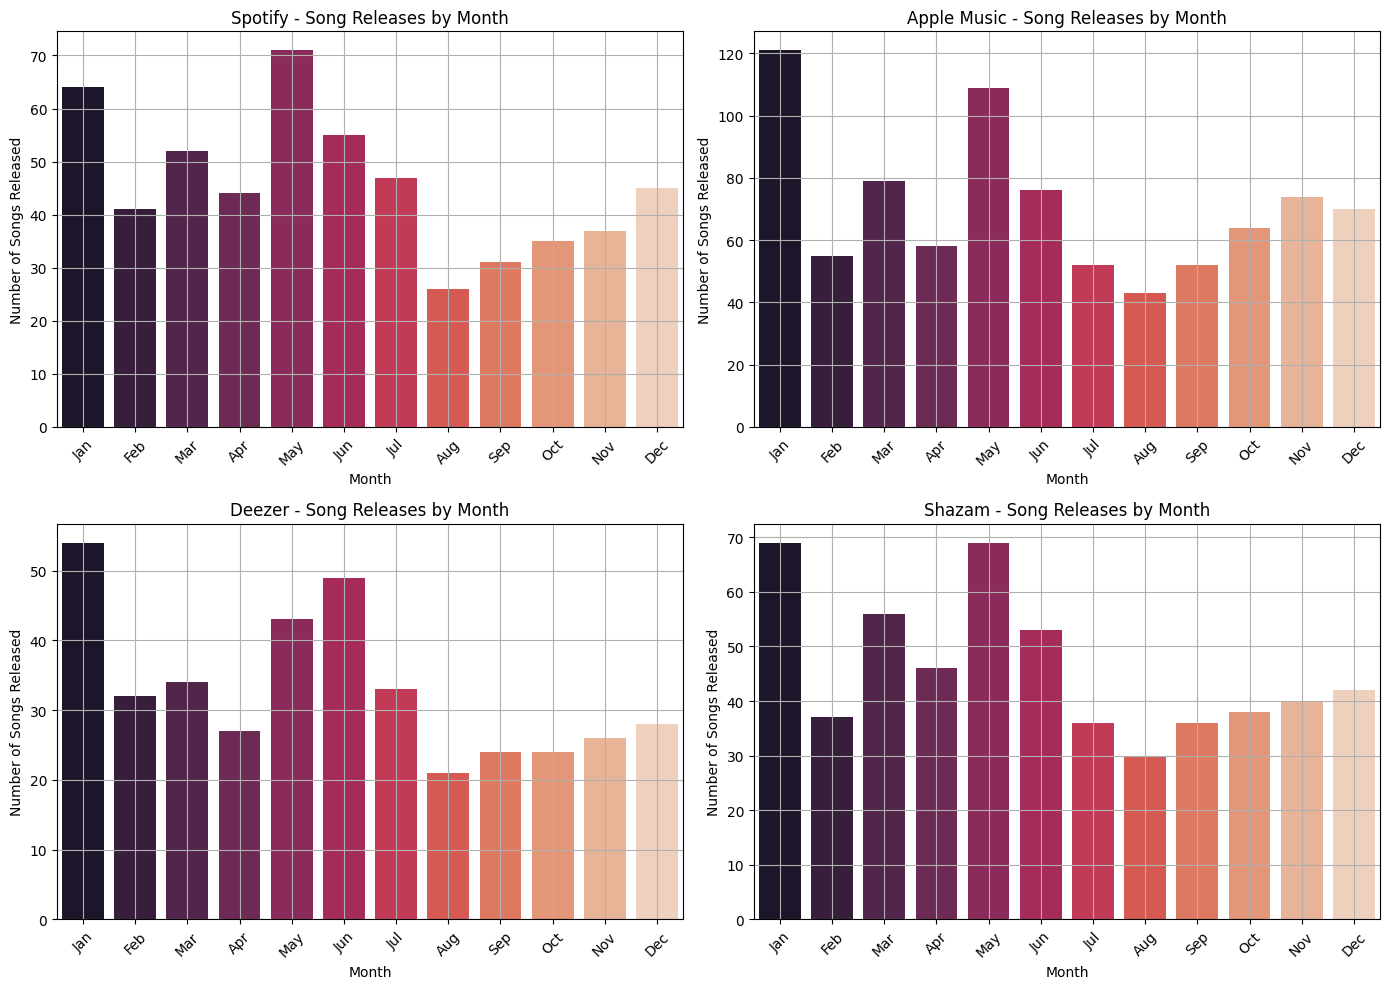

In [24]:
# Creating a 2x2 grid of subplots for monthly trends
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Define month names for x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, (platform, col) in enumerate(zip(platforms, platform_columns)):
    platform_df = df[df[col] > 0].copy()
    platform_df['release_date_string'] = platform_df['released_year'].astype(str) + '-' + \
                                        platform_df['released_month'].astype(str) + '-' + \
                                        platform_df['released_day'].astype(str)
    platform_df['release_date'] = pd.to_datetime(platform_df['release_date_string'], errors='coerce')
    monthly_releases = platform_df['release_date'].dt.month.value_counts().sort_index()
    monthly_releases_df = monthly_releases.reset_index()
    monthly_releases_df.columns = ['Month', 'Number of Songs Released']
    monthly_releases_df['Month'] = monthly_releases_df['Month'].astype(int) - 1  # Convert month numbers to 0-based index for labels
    
     # Print monthly release data
    print(f"\nMonthly Song Releases for {platform}:")
    for month_index, row in monthly_releases_df.iterrows():
        print(f"{month_names[row['Month']]}: {row['Number of Songs Released']} songs")
    
    sns.barplot(data=monthly_releases_df, x='Month', y='Number of Songs Released', ax=axes[i], palette='rocket')
    axes[i].set_title(f'{platform} - Song Releases by Month', fontsize=12)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Songs Released')
    axes[i].set_xticks(range(12))
    axes[i].set_xticklabels(month_names, rotation=45)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Predicting Popularity/Chart Performance

Classification Report for Spotify:
              precision    recall  f1-score   support

       False       0.38      0.44      0.41        72
        True       0.62      0.55      0.59       119

    accuracy                           0.51       191
   macro avg       0.50      0.50      0.50       191
weighted avg       0.53      0.51      0.52       191

Classification Report for Apple Music:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        13
        True       0.93      0.99      0.96       178

    accuracy                           0.92       191
   macro avg       0.47      0.49      0.48       191
weighted avg       0.87      0.92      0.89       191


Feature Importance for Spotify:
bpm                   0.255948
energy_%              0.252369
danceability_%        0.232247
acousticness_%        0.224732
instrumentalness_%    0.034704
dtype: float64

Feature Importance for Apple Music:
bpm                   0.257733
d

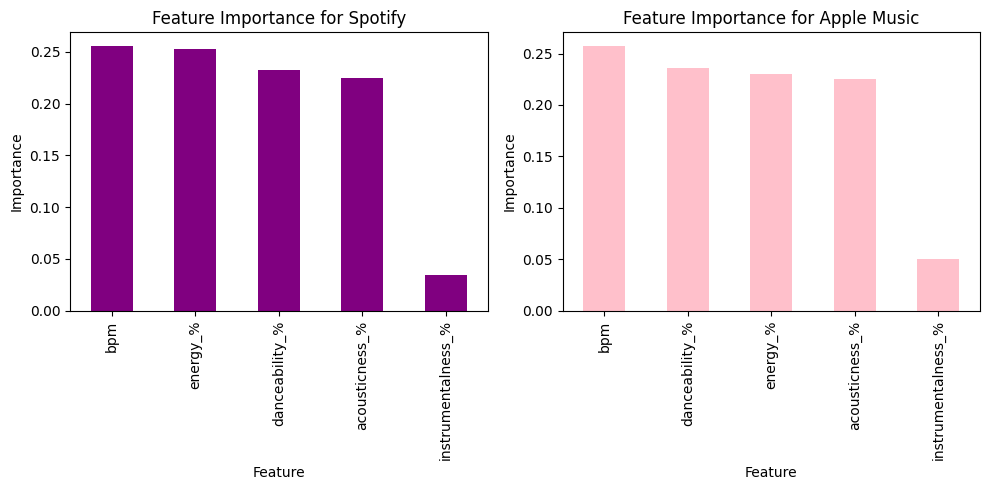

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Convert columns to appropriate types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Drop rows with NaN in target columns
df = df.dropna(subset=['in_spotify_charts', 'in_apple_charts'])

# Define features and target for Spotify and Apple Music
features = ['danceability_%', 'energy_%', 'acousticness_%', 'bpm', 'instrumentalness_%']
X = df[features]

# Convert target columns to binary classification (if not already binary)
df['in_spotify_charts'] = df['in_spotify_charts'] > 0
df['in_apple_charts'] = df['in_apple_charts'] > 0

# Split data for Spotify
X_spotify = X.copy()
y_spotify = df['in_spotify_charts']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Split data for Apple Music
X_apple = X.copy()
y_apple = df['in_apple_charts']
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(X_apple, y_apple, test_size=0.2, random_state=42)

# Train Random Forest Classifier for Spotify
rf_spotify = RandomForestClassifier(random_state=42)
rf_spotify.fit(X_train_spotify, y_train_spotify)
y_pred_spotify = rf_spotify.predict(X_test_spotify)

print("Classification Report for Spotify:")
print(classification_report(y_test_spotify, y_pred_spotify))

# Train Random Forest Classifier for Apple Music
rf_apple = RandomForestClassifier(random_state=42)
rf_apple.fit(X_train_apple, y_train_apple)
y_pred_apple = rf_apple.predict(X_test_apple)

print("Classification Report for Apple Music:")
print(classification_report(y_test_apple, y_pred_apple))

# Feature Importance for Spotify
spotify_feature_importance = pd.Series(rf_spotify.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance for Spotify:")
print(spotify_feature_importance)

# Feature Importance for Apple Music
apple_feature_importance = pd.Series(rf_apple.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance for Apple Music:")
print(apple_feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
spotify_feature_importance.plot(kind='bar', color='purple')
plt.title('Feature Importance for Spotify')
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
apple_feature_importance.plot(kind='bar', color='pink')
plt.title('Feature Importance for Apple Music')
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()

Classification Report
Detailed metrics on how well the model is performing for each class (True/False) in the prediction task.

**Precision - Out of all the songs the model predicted as "True" (i.e., successful on the platform), how many were actually successful?**
* For Spotify, the model correctly identified 62% of the truly successful songs out of all songs it predicted as successful.
* For Apple Music, the model correctly identified 93% of the truly successful songs out of all songs it predicted as successful.

**Recall - Out of all the actual successful songs, how many did the model successfully identify?**
* For Spotify, the model found 55% of the actual successful songs.
* For Apple Music, the model found 99% of the actual successful songs.

**F1-Score - A balance between precision and recall. It is the harmonic mean of precision and recall.**
* For Spotify, the balance score is 0.59, showing a moderate performance.
* For Apple Music, the balance score is 0.96, indicating very high performance.

**Accuracy - The percentage of correctly predicted songs (both successful and not successful).**
* For Spotify, the model is correct 51% of the time.
* Apple Music, the model is correct 92% of the time.

**Support - The number of actual instances of each class in the dataset.**
* For Spotify, there were 72 false (not successful) and 119 true (successful) instances.
* For Apple Music, there were 13 false (not successful) and 178 true (successful) instances.


Feature Importance
Which features (attributes) of the songs are most influential in predicting whether a song will be successful on each platform.

**Spotify:**
* bpm (Beats Per Minute): 25.6% importance
* energy_% (Energy Level): 25.2% importance
* danceability_% (Danceability): 23.2% importance
* acousticness_% (Acoustic Quality): 22.5% importance
* instrumentalness_% (Instrumentalness): 3.5% importance

This means that bpm, energy_%, danceability_%, and acousticness_% are very important in determining a song's success on Spotify, while instrumentalness_% is less important.

**Apple Music:**
* bpm: 25.8% importance
* danceability_%: 23.6% importance
* energy_%: 23.1% importance
* acousticness_%: 22.6% importance
* instrumentalness_%: 5.0% importance

Similar to Spotify, bpm, danceability_%, energy_%, and acousticness_% are crucial for predicting success on Apple Music. instrumentalness_% is slightly more important than on Spotify but still the least influential feature.


Spotifys' model is somewhat accurate at predicting successful songs but could be improved. The most influential features for Spotify predictions are bpm, energy_%, danceability_%, and acousticness_%.

Apple Musics' model is highly accurate, identifying successful songs very well. For Apple Music, the same features are important, with a bit more weight on instrumentalness_%.

This analysis shows that while both platforms value similar features, the importance and impact of each feature might differ slightly. The model’s success rates and feature importance provide insights into what factors influence a song's popularity on each platform and can guide further refinement of your prediction models.